<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

---

<center> <font color= #004A94> <font size = 5> Ingeniería Financiera | ITESO </font> <br> <br>

<center> <font color= #004A94> <font size = 6> Microestructura y Sistemas de Trading </font> <br> <br>

<center> <font color=#42c29b><font size=5> Laboratorio 2 <br> <br> Behavioral Finance para Trading </font> <br> <br>

<center> <H3>Profesor:</H1><font color=#004A94><font size=4> I.F. Juan Francisco Muñoz Elguezabal | franciscome@iteso.mx </font> <br> <br>

<center> <H3>Alumno:</H1><font color=#004A94><font size=4> I.F. Carlos Elias Nuño Tiscareño| if708830@iteso.mx </font> <br> <br>

# Indroducción:

En este trabajo se presentan una serie de herramientas que son utilizadas para poder analizar el comportamiento de un historial de una cuenta de trading, se logrará con la ayuda de medidas de atribución al desempeño, behavioral finance, todo esto con el objetivo de ver el desempeño del trader durante ese periodo de tiempo. 

Nota: Se utilizo el archivo del profesor debido a que en mi archivo unicamente contaba con posiciones ganadoras en lo que transcurrio el concurso, por lo que para tener una mayor visualizacion del analisis se uso dicho archivo.

# Analisis de cuenta de trading

Se extraen manualmente los datos de la cuenta de MetaTrader, donde se presenta el historial de transacciones ejecutadas en un tiempo determinado, para después presentar el analisis que se obtuvo de esta cuenta.

In [2]:
import funciones as fn
import visualizaciones as vz

archivo = "archivo_tradeview_1.xlsx"

df_archivo = fn.f_leer_archivo(archivo)
datos = df_archivo
datos = fn.f_columnas_tiempos(datos)
datos = fn.f_columnas_pips(datos)
datos = fn.capital_acm(datos)

f_estadisticas = fn.f_estadisticas_ba(datos)
Profit_diario = fn.f_profit_diario(datos)

En el siguiente DataFrame se puede observar la primera parte de los analisis, en donde obtenemos el tiempo que estuvo abierta cada posición, los pips que se ganaron/perdieron en cada operación que se ejecuto, para después ver la cantidad de capítal acumulado que se estuvo consiguiendo con cada operacion realizada, partiendo que el capital inicial que teniamos eran $5,000. A continuacion se muestra dicho DataFrame.

In [3]:
datos

,order,opentime,type,size,symbol,openprice,s/l,t/p,closetime,closeprice,commission,taxes,swap,profit,Time,Pips,Capital_acm
0,24316034,2019.08.27 06:57:50,buy,0.04,xauusd,1529.21000,1523.000,1543.0000,2019.08.27 09:16:01,1533.69000,0.0,0,0,17.92,8291,44.8,5017.92
1,24334215,2019.08.27 17:06:20,buy,0.01,eurjpy,117.66400,116.950,118.7000,2019.08.29 06:38:16,117.37400,0.0,0,0,-2.73,48716,-29.0,5015.19
2,24342155,2019.08.27 19:25:39,buy,0.05,eurjpy,117.34600,116.950,119.7000,2019.08.28 21:01:24,117.45200,0.0,0,0,5.00,5745,10.6,5020.19
3,24373260,2019.08.28 17:11:33,buy,0.01,eurusd,1.10791,1.104,1.1175,2019.08.29 06:38:28,1.10818,0.0,0,0,0.27,48415,2.7,5020.46
4,24392415,2019.08.29 06:35:27,buy,0.01,gbpusd,1.22024,1.208,1.2370,2019.08.29 06:37:23,1.21990,0.0,0,0,-0.34,116,-3.4,5020.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,25148355,2019.09.24 20:09:52,sell,0.06,xauusd,1532.02000,1538.000,0.0000,2019.09.24 21:18:43,1525.66000,0.0,0,0,38.16,4131,63.6,5210.31
80,25148480,2019.09.24 20:11:20,sell,0.02,xauusd,1531.50000,1538.000,0.0000,2019.09.24 21:18:46,1525.63000,0.0,0,0,11.74,4046,58.7,5222.05
81,25148522,2019.09.24 20:12:41,sell,0.01,xauusd,1531.86000,1538.000,0.0000,2019.09.24 21:18:49,1525.66000,0.0,0,0,6.20,3968,62.0,5228.25
82,25159294,2019.09.25 01:53:47,sell,0.06,xauusd,1531.06000,1537.000,0.0000,2019.09.25 15:24:31,1527.40000,0.0,0,0,21.96,48644,36.6,5250.21


# Estadísticas básicas:

En esta parte se muestra un diccionario generado donde tiene dentro de el dos tablas: 
>df_1_tabla: En esta primera tabla se muestra una visualización general de lo que ocurrio con la cuenta <br>
>df_1_ranking: En la segunda tabla del diccionario vemos la efectividad que se tuvo en las operaciones realizadas.

Se muestran los resultados obtenidos en el diccionario:

#### Estadísticas

In [3]:
f_estadisticas['Estadistica']

,Medida,Valor,Descripcion
0,Ops totales,84.000000,Operaciones totales
1,Ganadoras,46.000000,Operaciones ganadoras
2,Ganadoras_c,20.000000,Operaciones ganadoras de compra
3,Ganadoras_v,26.000000,Operaciones ganadoras de venta
4,Perdedoras,38.000000,Operaciones perdedoras
5,Perdedoras_c,19.000000,Operaciones perdedoras de compra
6,Perdedoras_v,19.000000,Operaciones perdedoras de venta
7,Media (Profit),3.025357,Mediana de profit de operaciones
8,Media (Pips),20.920595,Mediana de pips de operaciones
9,r_efectividad,0.547619,Ganadoras Totales/Operaciones Totales


En esta primera tabla que son las estadisticas de la cuenta observamos que se realizaron 84 operaciones, de las cuales 46 de ellas resultaron ganadoras por lo que obtenemos un efectividad del 54.7%, donde la mayor parte de estas fueron operaciones ejecutadas en short (de venta). La media que se obtiene en los profit es positiva lo que nos indica que la cuenta a tenido un rendimiento favorable. Mientras que por otro lado las operaciones perdedoras que fueron 38 en total, tanto de compra como de venta fueron las mismas, por lo que al observar las posiciones tanto ganadoras y perdedoras se podría recomendar al trader que se trataran de ejecutar mas posiciones en corto que es donde vemos que tiene mejor efectividad (30.95) y asi aumentar poder aumentar un poco el ratio de efectividad general.

#### Efectividad:

In [4]:
f_estadisticas['Efectividad']

,symbol,profit
0,audusd,33.3333%
1,btcusd,100.0%
2,eurgbp,100.0%
3,eurjpy,28.5714%
4,eurusd,47.8261%
5,gbpjpy,25.0%
6,gbpusd,66.6667%
7,usdcad,28.5714%
8,usdjpy,60.0%
9,usdmxn,80.0%


En esta segunda tabla podemos comparar la efectividad que se tuvo con cada intrumento utilizado, por lo que podemos observar que la cuenta tiene dos intrumentos (btcusd, eurgbp) con una tasa de efectividad muy buena, se podría recomendar invertir mas en estos insturmentos y menos en los que obtuvienos menos efectividad pero como la muestra es un poco pequeña es complicado asegurar que será una estrategía factible, por lo que se tendría que realizar con una cantidad de datos (operaciones realizadas) mas grande para obtener certeza de ello.

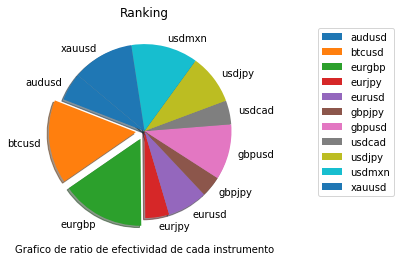

In [5]:
vz.df_1_ranking(f_estadisticas)

# Medidas de atribución al desempeño

En esta parte se generaron dos DataFrames:
>Profit: En el cual se muestra el profit diario y el profit acumulado diario <br>
>Estadisticas_mad: Contiene una tabla con las medidas de atribución al desempeño de la cuenta.

#### Profit diario/ profit diario acumulado

In [6]:
Profit_diario

,timestamp,profit_d,profit_acm_d
0,2019-08-27,27.61,5027.61
1,2019-08-28,5.00,5032.61
2,2019-08-29,-1.52,5031.09
3,2019-08-30,-17.16,5013.93
4,2019-08-31,0.00,5013.93
5,2019-09-01,0.00,5013.93
6,2019-09-02,-33.90,4980.03
7,2019-09-03,-137.90,4842.13
8,2019-09-04,29.11,4871.24
9,2019-09-05,0.00,4871.24


En este DataFrame podemos observar por fechas el capital se fue obteniendo diariamente por las operaciones que se hicieron en ese dia, mientras que en la otra columna se presenta la cantidad acumulada de los profit diarios. A simple vista se pueden observar que hubieron mas dias positivos que negativos, pero tambien vemos que hubo un dia que los profit perdidos (137.9) fueron mayores a cualquier ganancia del dia, pero esto se compensa con que tengamos mas dias positivos.

#### Estadisticas MAD

In [7]:
fn.f_estadisticas_mad(datos)

,metrica,valor,descripcion
0,sharpe,0.146543,Sharpe Ratio
1,sortino_c,0.295308,Sortino Ratio para Posiciones de Compra
2,sortino_v,0.0628747,Sortino Ratio para Posiciones de Venta
3,drawdown_capi,El dia 2019-09-03 00:00:00 con $-0.04 %,DrawDown de Capital
4,drawup_capi,0,DrawUp de Capital
5,information_r,0.817108,Information Ratio


#### Interpretación

<h4>Sharpe:</h4>

Como podemos observar en el resultado es mayor a la tasa libre de riesgo, lo que se espera que deba hacer el trader, se concluye que el trader tiene un rendimiento excedente despues de la tasa libre de riesgo.

El valor esperado de los rendimientos es usado para poder ser comparado con la de la tasa libre de riesgo, de esta manera se puede saber el rendimiento que se podría tener en invertir en un lado u otro.

<h4>Sortino ratio:</h4>
En este caso podemos ver que tanto para el caso de compra como para el caso de venta el sortino es menor al rendimiento promedio objetivo.

La diferencia que se tiene es que sharpe se calcula con los rendimiento diarios obtenidos, y en la sortino lo que se utilizo fueron las desviaciones estandar para posiciones de compra y venta respectivamente.

En mi opinion son buenas las dos herramientas de trabajo pero para poder hacer un mejor analisis utilizaria el sortino debido que ahi dividimos las operaciones en compra y venta por lo que podemos deducir par aun futuro que posición si compra o venta tenemos que mejorar para aunmentar los rendimientos y disminuir la volatilidad.

<h4>Drawdown/DrawUp:</h4>

En el Drawdown nos podemos percatar en la grafica de la parte de abajo el rango en que obtuno menos rendimiento o hubo una perdida en la cuenta, se puede visualizar que el punto maximo de este fue el 3 de sep.

<h4>Information ratio:</h4>

En este caso se utilizo el SP500 para ser un activo a comparar en cuestion de rendimiento con nuestro historial de operaciones

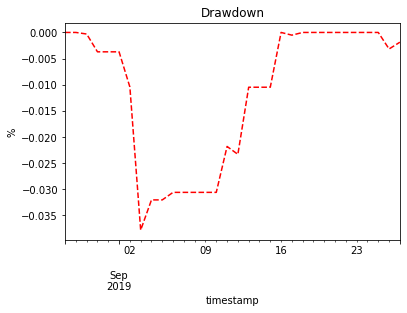

In [8]:
# Grafica de Drawdown
vz.drawdown(datos)